<a href="https://colab.research.google.com/github/DavidGoing/PHYS3151-Machine-Learning-in-Physics-2024/blob/main/multivariate-linear-regression/gradient_descent%26conjugate_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,100)

def f(x):
    return 4*x**2 - 3 * x + 7

def df(x):
    return 8 * x - 3

$$
\begin{eqnarray}
f(x)&=&4x^2-3x+7 \\
    &=& (2x)^2 - 2\cdot(2x)\cdot\frac{3}{4} + (\frac{3}{4})^2 - (\frac{3}{4})^2 + 7 \\
    &=& (2x - \frac{3}{4})^2 + \frac{103}{16}
\end{eqnarray}
$$    
The minimal is at $x_0=\frac{3}{8}=0.375$ and the minimal value of $f(x_0)=-\frac{103}{16}=6.4375$

Mininum occurs at:  0.37614919663163465
Number of iterations:  88
Minimal value is:  6.437505282611593


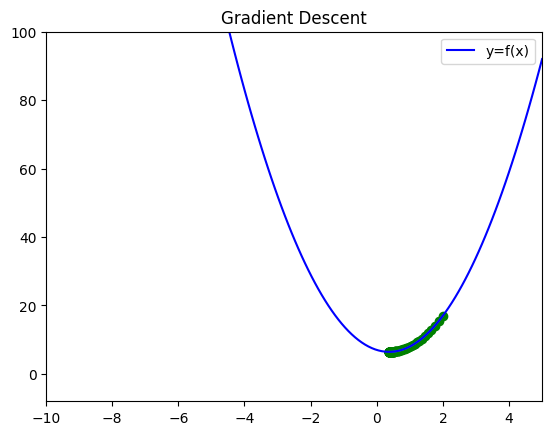

In [2]:
x_new = 2
alpha = 0.01
epsilon = 0.0001
max_iters = 100000

x_list, y_list = [x_new],[f(x_new)]
for _i in range(max_iters):
    x_prev = x_new
    x_new = x_prev - alpha*df(x_prev)

    x_list.append(x_new)
    y_list.append(f(x_new))

# either the difference in J(theta), or in theta, is both fine.
#    step = f(x_new) - f(x_prev)
    step = x_new - x_prev
    if abs(step) <= epsilon:
        break

print ("Mininum occurs at: ", str(x_new))
print ("Number of iterations: ", str(len(x_list)))
print ("Minimal value is: ", str(f(x_new)))

plt.scatter(x_list, y_list, c="g")
plt.plot(x_list, y_list)
plt.plot(x,f(x),c="b",label='y=f(x)')
plt.title("Gradient Descent")
plt.grid
plt.xlim(-10,5)
plt.ylim(-8,100)
plt.legend()
plt.show()

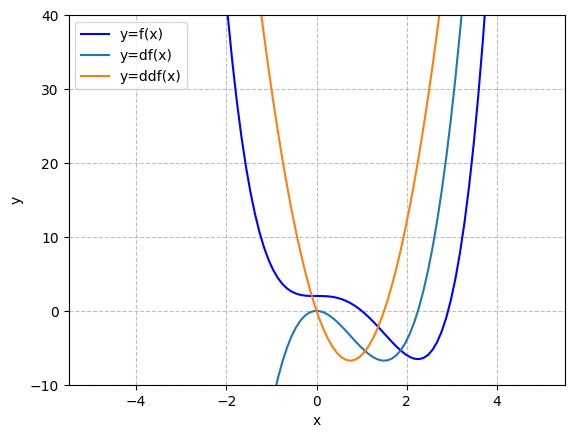

In [3]:
def f(x):
    return x**4 - 3*x**3 + 2

def df(x):
    return 4*x**3 - 9*x**2

def ddf(x):
    return 12*x**2 - 18*x

plt.plot(x,f(x),c="b",label='y=f(x)')
plt.plot(x,df(x),label='y=df(x)')
plt.plot(x,ddf(x),label='y=ddf(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=.8,linestyle='--')
plt.ylim(-10,40)
plt.legend()
plt.show()

Local mininum occurs at:  -0.29803813918582384
Minimal value is:  2.08731145050224
Number of iterations:  21


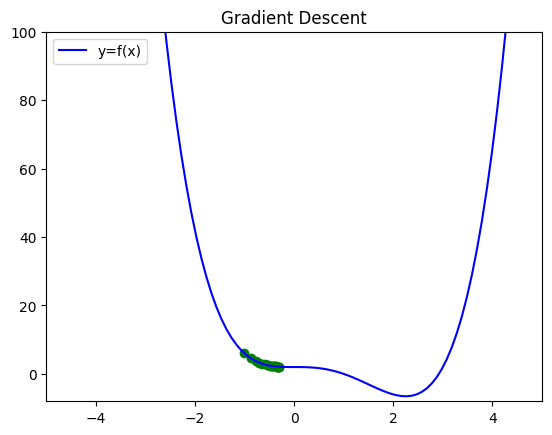

In [5]:
x_new = -1
alpha = 0.01
epsilon = 0.01
max_iters = 100000

x_list, y_list = [x_new],[f(x_new)]
for _i in range(max_iters):
    x_prev = x_new
    x_new = x_prev - alpha*df(x_prev)

    x_list.append(x_new)
    y_list.append(f(x_new))

    # either the difference in J(theta), or in theta, is both fine.
#    step = f(x_new) - f(x_prev)
    step = x_new - x_prev
    if abs(step) <= epsilon:
        break

print ("Local mininum occurs at: ", str(x_new))
print ("Minimal value is: ", str(f(x_new)))
print ("Number of iterations: ", str(len(x_list)))

plt.scatter(x_list, y_list, c="g")
plt.plot(x_list, y_list)
plt.plot(x,f(x),c="b",label='y=f(x)')
plt.title("Gradient Descent")
plt.grid
plt.xlim(-5,5)
plt.ylim(-8,100)
plt.legend()
plt.show()

Consider the quadratic form
$$f(\textbf{x})=\frac{1}{2}\textbf{x}^{T}A\textbf{x}-\textbf{b}^{T}\textbf{x}+c$$
where A is a **real symmetric positive definite** (SPD) matrix. \\
The gradient of $f(\textbf{x})$ is
$$\nabla f(\textbf{x})=A\textbf{x}-\textbf{b}$$
As a result, the problem on solving the system of equations $A\textbf{x}-\textbf{b}=\textbf{0}$, is equivalent to a optimization problem on minimizing $f(x)$ defined above.

In [6]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import itertools
%matplotlib inline
#%matplotlib notebook

In [7]:
A = np.matrix([[3.,2.],[2.,6.]])
b = np.matrix([[2.],[-8.]])
c = 0.0

$$
f(x_1,x_2)=\frac{1}{2} (x_1,x_2) \begin{pmatrix} 3 & 2 \\ 2 & 6 \end{pmatrix}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} + (2,-8)\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
$$
which is equal to
$$
f(x_1,x_2)=\frac{1}{2}\big(3x^{2}_1+4x_1 x_2 +2x_1 - 8x_2\big)
$$

In [10]:
def f(x,A,b,c):
    return float(0.5*x.T*A*x - b.T*x + c)
def paraboloid(A,b,c):
    fig = plt.figure(figsize=(8,5))
    qf  = fig.add_subplot(projection='3d')
    size= 40
    x1  = list(np.linspace(-3,3,size))
    x2  = list(np.linspace(-3,3,size))
    x1, x2 = np.meshgrid(x1,x2)
    zs = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]],[x2[i,j]]])
            zs[i,j] = f(x,A,b,c)
    qf.plot_surface(x1,x2,zs,rstride=1,cstride=1,cmap=cm.rainbow,linewidth=0)
    fig.show()
    return x1, x2, zs

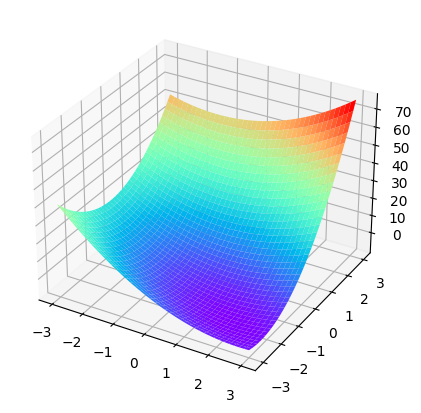

In [11]:
x1,x2,zs = paraboloid(A,b,c)

In [12]:
def contoursteps(x1,x2,zs,steps=None):
    fig = plt.figure(figsize=(8,8))
    levels = [-9.9,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,10]
    cp = plt.contour(x1,x2,zs,levels)
    plt.clabel(cp,inline=1,fontsize=8)
    plt.grid(True)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0],steps[:,1],'-o')
    fig.show()

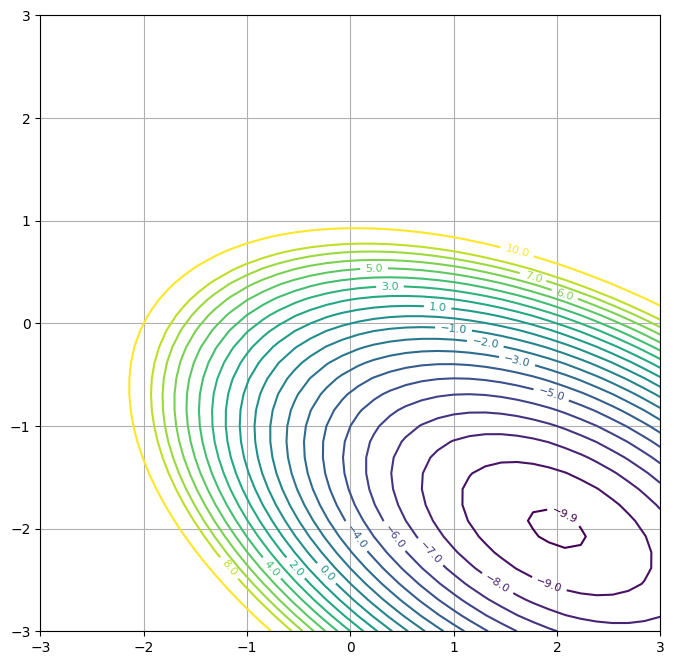

In [13]:
contoursteps(x1,x2,zs)

The minimal is at (2,-2) and its value is -10. And we first try gradient descent method.

In [14]:
x = np.matrix([[-1.],[2.]])
steps = [(-1.,2.)]
i = 0
imax = 1000
eps = 0.001
alpha = 0.01
r = b - A * x
delta = r.T * r
delta0 = delta
while i< imax and delta > eps**2 * delta0:
    x = x + alpha*r
    steps.append((x[0,0],x[1,0]))
    r = b - A * x
    delta = r.T * r
    i +=1

Local mininum occurs at: [[ 1.99206236]
 [-1.99603118]]
Number of iterations: 308


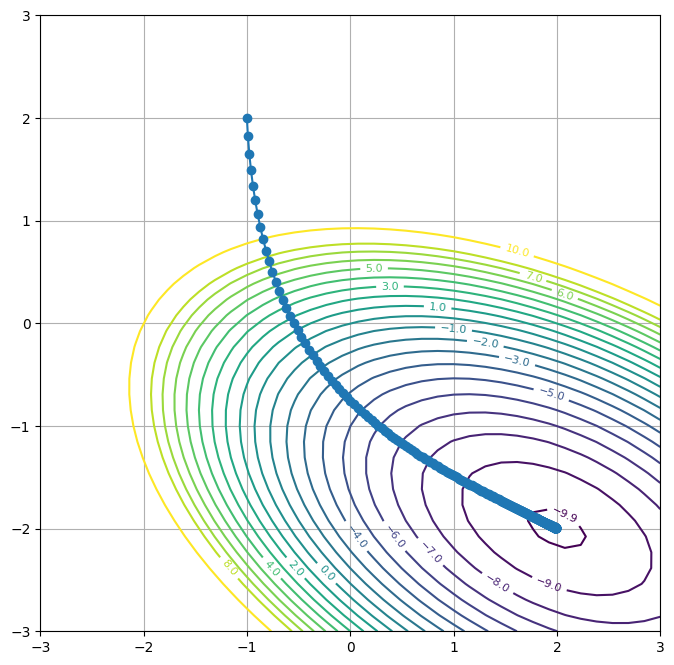

In [15]:
contoursteps(x1,x2,zs,steps)
print ("Local mininum occurs at: "+ str(x))
print ("Number of iterations: "+ str(i))

Now let's try the steepest descent method.

In [16]:
x = np.matrix([[-1.],[2.]])
steps = [(-1.,2.)]
i = 0
imax = 1000
eps = 0.001
r = b - A * x
delta = r.T * r
delta0 = delta
while i< imax and delta > eps**2 * delta0:
    alpha = float(delta/float(r.T * (A * r)))
    x = x + alpha*r
    steps.append((x[0,0],x[1,0]))
    r = b - A * x
    delta = r.T * r
    i +=1

Local mininum occurs at: [[ 1.99713484]
 [-1.99617979]]
Number of iterations: 10


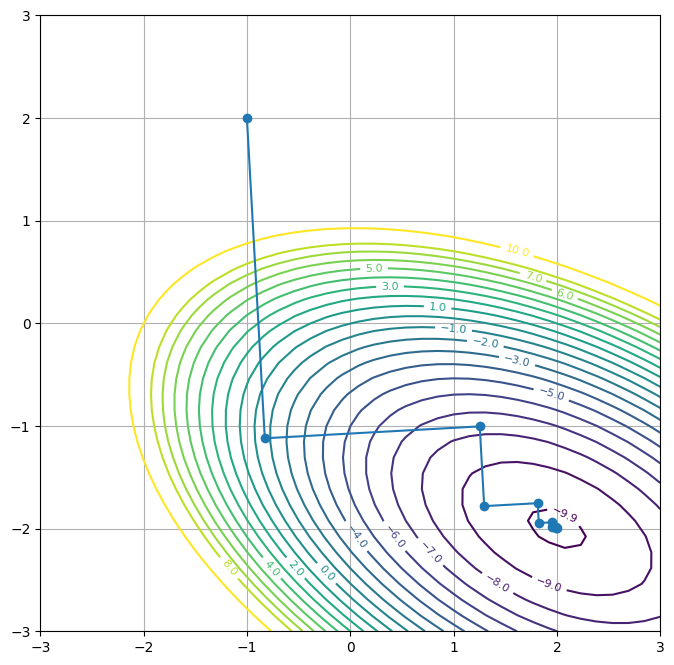

In [17]:
contoursteps(x1,x2,zs,steps)
print ("Local mininum occurs at: "+ str(x))
print ("Number of iterations: "+ str(i))

The quadratic form here is $\frac{1}{2}(x_1,x_2)\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}=\frac{1}{2}(x^2_1+x^2_2)$

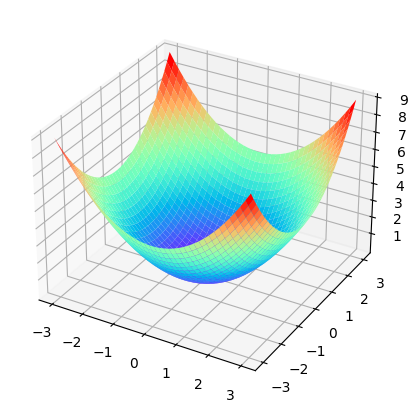

In [18]:
Around = np.matrix([[1,0],[0,1]])
bround = np.matrix([[0],[0]])
cround = 0
x1,x2,zs=paraboloid(Around, bround,cround)

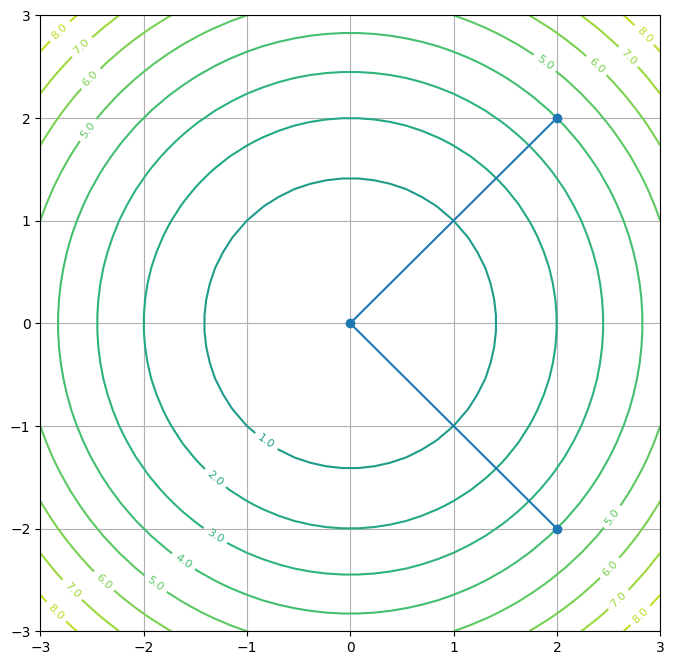

In [19]:
va = np.matrix([[2],[2]])
vb = np.matrix([[2],[-2]])
contoursteps(x1,x2,zs,[(va[0,0],va[1,0]),(0,0),(vb[0,0],vb[1,0])])

In [20]:
float(va.T * vb)

0.0

$\vec{v_a}$ and $\vec{v_b}$ are orthogonal vectors and conjugate with respect to identity matrix
$$
\vec{v_a}\cdot\vec{v_b} = 0
$$

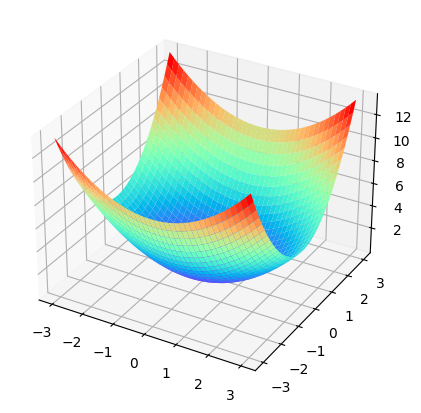

In [21]:
Ascaled = np.matrix([[1,0],[0,2]])
bscaled = np.matrix([[0],[0]])
cscaled = 0
x1,x2,zs = paraboloid(Ascaled, bscaled, cscaled)

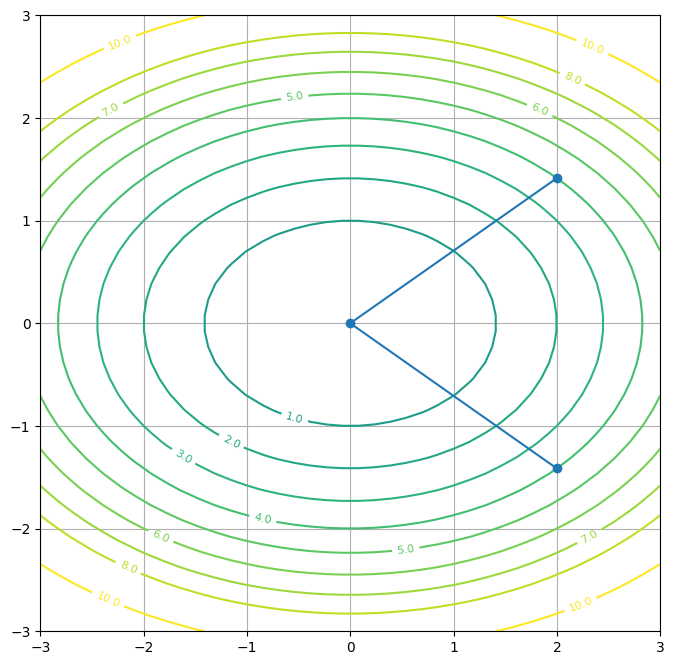

In [22]:
va = np.matrix([[2],[np.sqrt(2)]])
vb = np.matrix([[2],[-np.sqrt(2)]])
contoursteps(x1,x2,zs,[(va[0,0],va[1,0]),(0,0),(vb[0,0],vb[1,0])])

now $\vec{v_a}$ and $\vec{v_b}$ are no longer orthogonal to each other, but they are conjugate vectors with respect to the matrix $A_{scaled}$, namely,
$$
\vec{v_a}\cdot A \cdot \vec{v_b} = 0
$$

In [23]:
print(float(va.T * vb))

print(float(va.T * Ascaled * vb))

1.9999999999999996
-8.881784197001252e-16


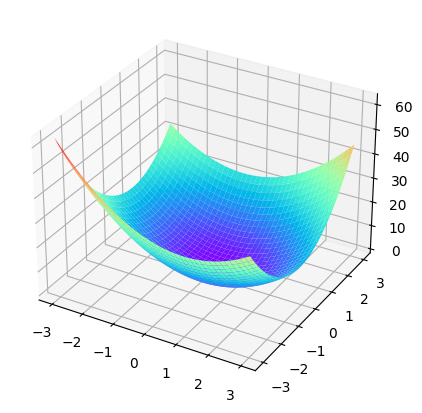

In [24]:
A = np.matrix([[4.,1.],[1.,6.]])
b = np.matrix([[1.],[2.]])
c = 0.0
x1, x2, zs = paraboloid(A,b,c)

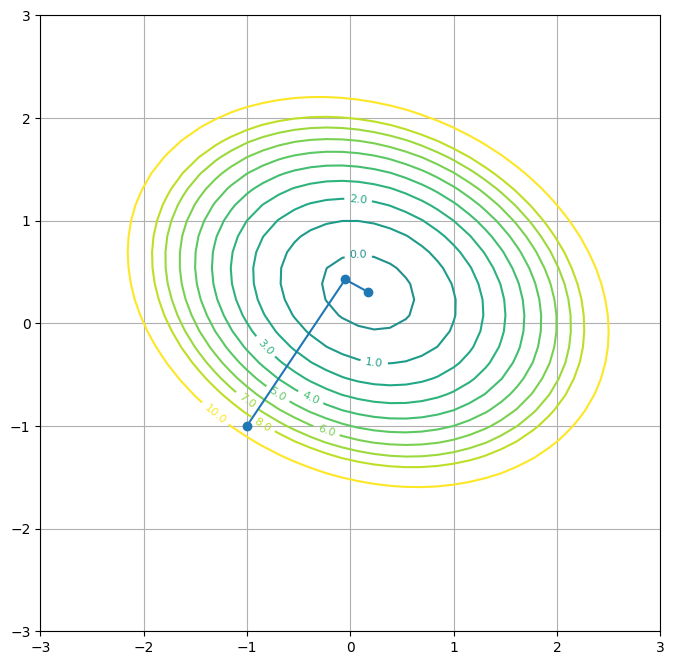

In [25]:
x = np.matrix([[-1.],[-1.]])
steps = [(-1.,-1.)] # steps is a list and the tuple (-1,-1) is the initial position
i = 0
imax = 3
eps = 0.01
r = b - A * x
p = r
deltanew = r.T * r
delta0 = deltanew
while i < imax and deltanew > eps**2 * delta0:
    alpha = float(deltanew / float(p.T * (A * p)))
    x = x + alpha * p
    steps.append((x[0,0],x[1,0]))
    r = r - alpha * (A * p)
    deltaold = deltanew
    deltanew = r.T * r
    beta = float(deltanew / float(deltaold))
    p = r + beta * p
    i += 1

contoursteps(x1, x2, zs, steps)


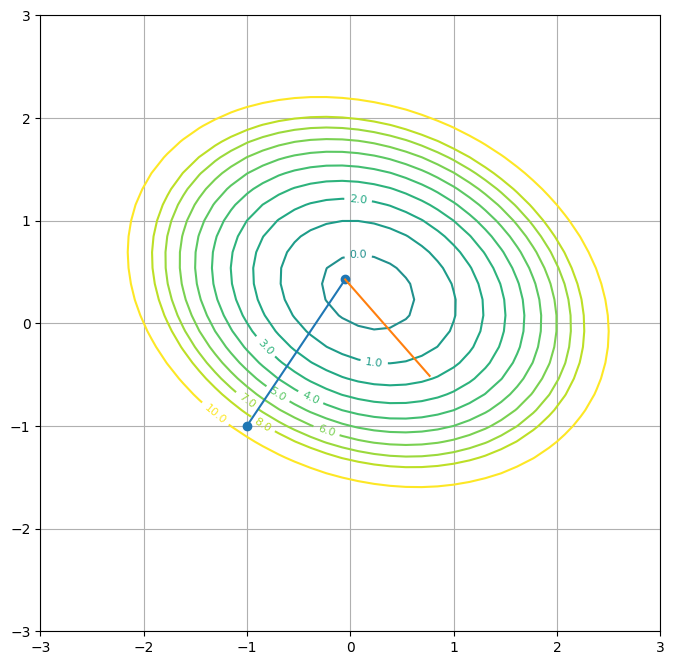

In [26]:
x = np.matrix([[-1.],[-1.]])
steps = [(-1.,-1.)]
r = b - A*x
d = r
deltanew = r.T * r
delta0 = deltanew
alpha = float(deltanew / float(d.T * A * d))
x = x + alpha * d
steps.append((x[0,0],x[1,0]))
r = b - A * x
contoursteps(x1,x2,zs,[(-1,-1),(x[0,0],x[1,0])])
plt.plot([x[0,0],r[0,0]],[x[1,0],r[1,0]])
plt.show()

In [27]:
d.T  * r

matrix([[5.32907052e-15]])

# Steepest descent vs. Conjugate gradient

The limitation of steepest descent methond comparing to conjugate gradient method will be significant when eigenvalues of the matrix are dramatically different from each other.

Consider the following case, where
$$A=\begin{pmatrix}
21 & 19\\
19 & 21
\end{pmatrix}$$
with two eigenvalues being 40 and 2.

In [28]:
A = np.matrix([[21.,19.],[19.,21.]])
b = np.matrix([[-3.],[-2.]])
c = 0.0

In [32]:
def paraboloid(A,b,c):
    fig = plt.figure(figsize=(8,5))
    qf  = fig.add_subplot(projection='3d')
    size= 80
    x1  = list(np.linspace(-3,3,size))
    x2  = list(np.linspace(-3,3,size))
    x1, x2 = np.meshgrid(x1,x2)
    zs = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]],[x2[i,j]]])
            zs[i,j] = f(x,A,b,c)
    qf.plot_surface(x1,x2,zs,rstride=1,cstride=1,cmap=cm.rainbow,linewidth=0)
    fig.show()
    return x1, x2, zs

In [33]:
def contoursteps(x1,x2,zs,steps=None):
    fig = plt.figure(figsize=(8,8))
    levels = range(-10,15,2)
    cp = plt.contour(x1,x2,zs,levels)
    plt.clabel(cp,inline=1,fontsize=8)
    plt.grid(True)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0],steps[:,1],'-o')
    fig.show()

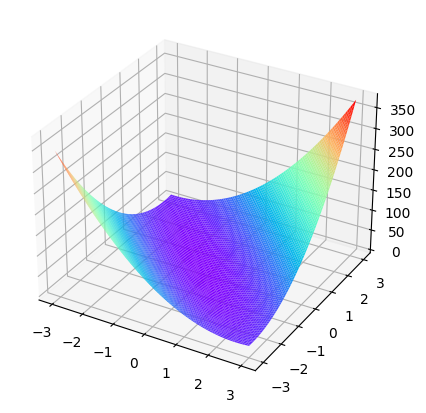

In [34]:
x1,x2,zs = paraboloid(A,b,c)

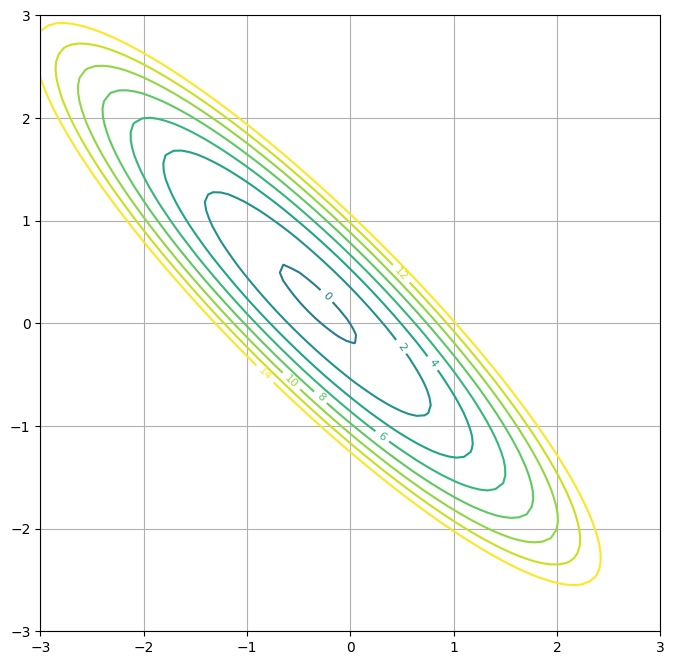

In [35]:
contoursteps(x1,x2,zs)

In [36]:
x = np.matrix([[2.],[-2.]])
steps = [(2.,-2.)]
i = 0
imax = 1000
eps = 0.001
r = b - A * x
delta = r.T * r
delta0 = delta
while i< imax and delta > eps**2 * delta0:
    alpha = float(delta/float(r.T * (A * r)))
    x = x + alpha*r
    steps.append((x[0,0],x[1,0]))
    r = b - A * x
    delta = r.T * r
    i +=1

Local mininum occurs at: [[-0.31032516]
 [ 0.18544272]]
Number of iterations: 52


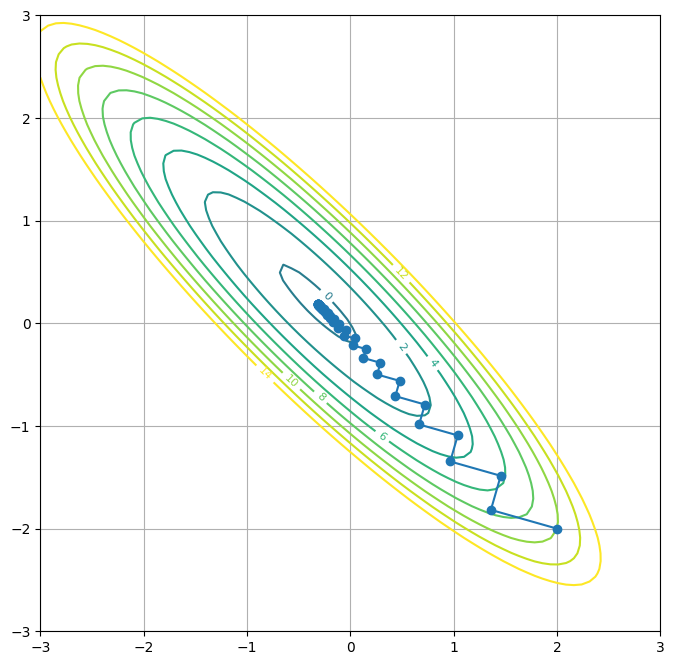

In [37]:
contoursteps(x1,x2,zs,steps)
print ("Local mininum occurs at: "+ str(x))
print ("Number of iterations: "+ str(i))

In [38]:
x = np.matrix([[2.],[-2.]])
steps = [(2.,-2.)]
i = 0
imax = 3
eps = 0.01
r = b - A * x
p = r
deltanew = r.T * r
delta0 = deltanew
while i < imax and deltanew > eps**2 * delta0:
    alpha = float(deltanew / float(p.T * (A * p)))
    x = x + alpha * p
    steps.append((x[0,0],x[1,0]))
    r = r - alpha * (A * p)
    deltaold = deltanew
    deltanew = r.T * r
    beta = float(deltanew / float(deltaold))
    p = r + beta * p
    i += 1

In [39]:
A*x

matrix([[-3.],
        [-2.]])

Local mininum occurs at: [[-0.3125]
 [ 0.1875]]
Number of iterations: 2


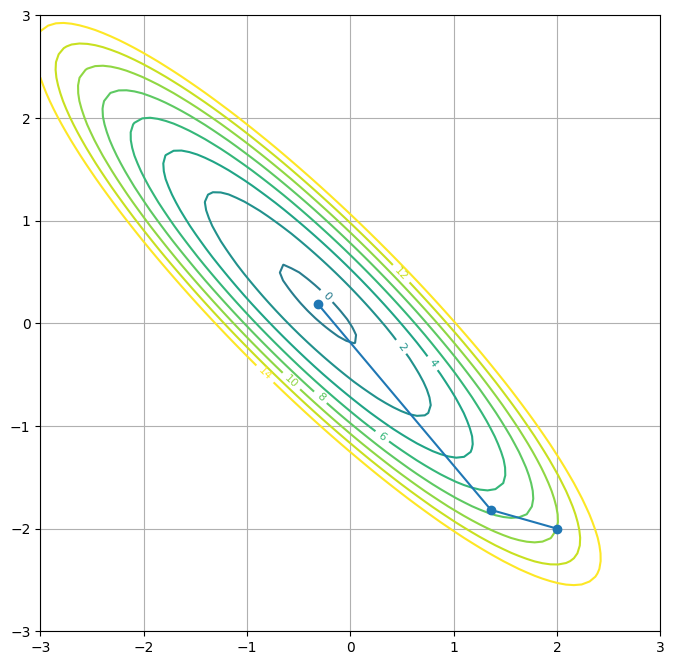

In [40]:
contoursteps(x1, x2, zs, steps)
print ("Local mininum occurs at: "+ str(x))
print ("Number of iterations: "+ str(i))

This example also demonstrate the importance of normalizing data sets, escepcially when they are of different orders of magnitudes.